Ensuring all the requirements

In [1]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())
print("GPU name:", torch.cuda.get_device_name(torch.cuda.current_device()) if torch.cuda.is_available() else "No GPU found")

CUDA available: True
GPU count: 1
Current device: 0
GPU name: NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
pip install datasets torch accelerate


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install tf-keras

  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 2.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 2.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 2.2 MB/s  0:00:00
Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl (331.9 MB)
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)

  Attempting uninstall: protobuf

    Found existing installation: protobuf 4.25.8

    Uninstalling protobuf-4.25.8:

      Successfully uninstalled protobuf-4.25.8

   ---------------------------------------- 0/5 [protobuf]
   ---------------------------------------- 0/5 [protobuf]
   

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\Python\\python folder\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
pip install protobuf==3.20.3

  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.2
    Uninstalling protobuf-6.33.2:
      Successfully uninstalled protobuf-6.33.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.1 requires ml-dtypes<0.5.0,>=0.3.1, but you have ml-dtypes 0.5.4 which is incompatible.
tensorflow-intel 2.17.1 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.20.0 which is incompatible.


In [13]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
print("Python version:", sys.version)

try:
    import torch
    print("✅ PyTorch installed:", torch.__version__)
except:
    print("❌ PyTorch NOT installed")

try:
    import transformers
    print("✅ Transformers installed:", transformers.__version__)
except:
    print("❌ Transformers NOT installed")

try:
    from transformers.models.distilbert import DistilBertForSequenceClassification
    print("✅ DistilBERT module accessible")
except Exception as e:
    print("❌ DistilBERT import failed:", e)

Python version: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
✅ PyTorch installed: 2.7.1+cu118
✅ Transformers installed: 4.57.3
✅ DistilBERT module accessible


In [2]:
import traceback

try:
    from transformers.models.distilbert.modeling_distilbert import DistilBertForSequenceClassification
    print("✅ Direct import successful")
except Exception as e:
    print("❌ Error details:")
    traceback.print_exc()

✅ Direct import successful


In [3]:
import transformers
import os

transformers_path = os.path.dirname(transformers.__file__)
distilbert_path = os.path.join(transformers_path, "models", "distilbert", "modeling_distilbert.py")

print(f"Transformers location: {transformers_path}")
print(f"DistilBERT file exists: {os.path.exists(distilbert_path)}")

if os.path.exists(distilbert_path):
    print(f"File size: {os.path.getsize(distilbert_path)} bytes")

Transformers location: d:\Python\python folder\Lib\site-packages\transformers
DistilBERT file exists: True
File size: 56462 bytes


In [4]:
import transformers, torch
print("Transformers:", transformers.__version__)
print("Torch:", torch.__version__)


Transformers: 4.57.3
Torch: 2.7.1+cu118


Loading and modifying Dataset

In [6]:
import os
import pandas as pd

# Go from: Code/Urgency Detection → Code → Project Root
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.getcwd()))

DATA_PATH = os.path.join(
    PROJECT_ROOT,
    "Cleaned data",
    "final_email_dataset_clipped.csv"
)

df = pd.read_csv(DATA_PATH)

print(df.shape)
print(df.columns)
print(df.head())

(502505, 5)
Index(['clean_text', 'category', 'auto_category', 'auto_urgency',
       'email_length'],
      dtype='object')
                                          clean_text category auto_category  \
0  Traveling to have a business meeting takes the...  unknown         other   
1                     test successful.  way to go!!!  unknown         other   
2  Randy,\n Can you send me a schedule of the sal...  unknown       request   
3                  Let's shoot for Tuesday at 11:45.  unknown         other   
4  Greg,\n How about either next Tuesday or Thurs...  unknown         other   

  auto_urgency  email_length  
0          low           783  
1          low            30  
2       medium           185  
3          low            33  
4          low            57  


In [7]:
df_copy = df.copy()

In [8]:
df_bert = df[['clean_text', 'auto_category']].sample(50000, random_state=42)

Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_bert['label'] = le.fit_transform(df_bert['auto_category'])


In [10]:
label_map = dict(zip(le.classes_, le.transform(le.classes_)))


Train-test Split

In [11]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_bert['clean_text'],
    df_bert['label'],
    test_size=0.2,
    stratify=df_bert['label'],
    random_state=42
)


Tokenization using DistilBERT

In [12]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

train_enc = tokenizer(list(train_texts), truncation=True, padding=True, max_length=256)
val_enc = tokenizer(list(val_texts), truncation=True, padding=True, max_length=256)


Building Dataset Class

In [13]:
import torch

class EmailDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx], dtype=torch.long)  # Added dtype=torch.long
        return item

    def __len__(self):
        return len(self.labels)

Loadig DistilBERT

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=6   # adjust if you merged classes
)

print("✅ DistilBERT loaded successfully")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ DistilBERT loaded successfully


Training the model

In [15]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./bert_results",
    eval_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    logging_steps=500,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    report_to="none"  # Disable TensorBoard and other logging
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=EmailDataset(train_enc, train_labels),
    eval_dataset=EmailDataset(val_enc, val_labels)
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,0.241600,0.252801
2,0.195200,0.232040


TrainOutput(global_step=5000, training_loss=0.25371739807128907, metrics={'train_runtime': 3407.6183, 'train_samples_per_second': 23.477, 'train_steps_per_second': 1.467, 'total_flos': 5299073925120000.0, 'train_loss': 0.25371739807128907, 'epoch': 2.0})

In [16]:
from sklearn.metrics import classification_report

preds = trainer.predict(EmailDataset(val_enc, val_labels))
y_pred = preds.predictions.argmax(axis=1)

print(classification_report(val_labels, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

   complaint       0.82      0.63      0.71       334
    feedback       0.90      0.82      0.86      1205
         ham       0.82      0.65      0.73        51
       other       0.92      0.92      0.92      2886
     request       0.92      0.95      0.93      5515
        spam       0.00      0.00      0.00         9

    accuracy                           0.91     10000
   macro avg       0.73      0.66      0.69     10000
weighted avg       0.91      0.91      0.91     10000



d:\Python\python folder\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Python\python folder\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Python\python folder\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [17]:
model.save_pretrained("models/distilbert_classifier")
tokenizer.save_pretrained("models/distilbert_classifier")
# Verify saved model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

loaded_model = AutoModelForSequenceClassification.from_pretrained("models/distilbert_classifier")
loaded_tokenizer = AutoTokenizer.from_pretrained("models/distilbert_classifier")

print("✅ Model and tokenizer loaded successfully from saved directory")

✅ Model and tokenizer loaded successfully from saved directory


In [23]:
loaded_model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [24]:
loaded_tokenizer

DistilBertTokenizerFast(name_or_path='models/distilbert_classifier', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [18]:
predictions = trainer.predict(
    EmailDataset(val_enc, val_labels)
)

y_true = val_labels.values
y_pred = predictions.predictions.argmax(axis=1)


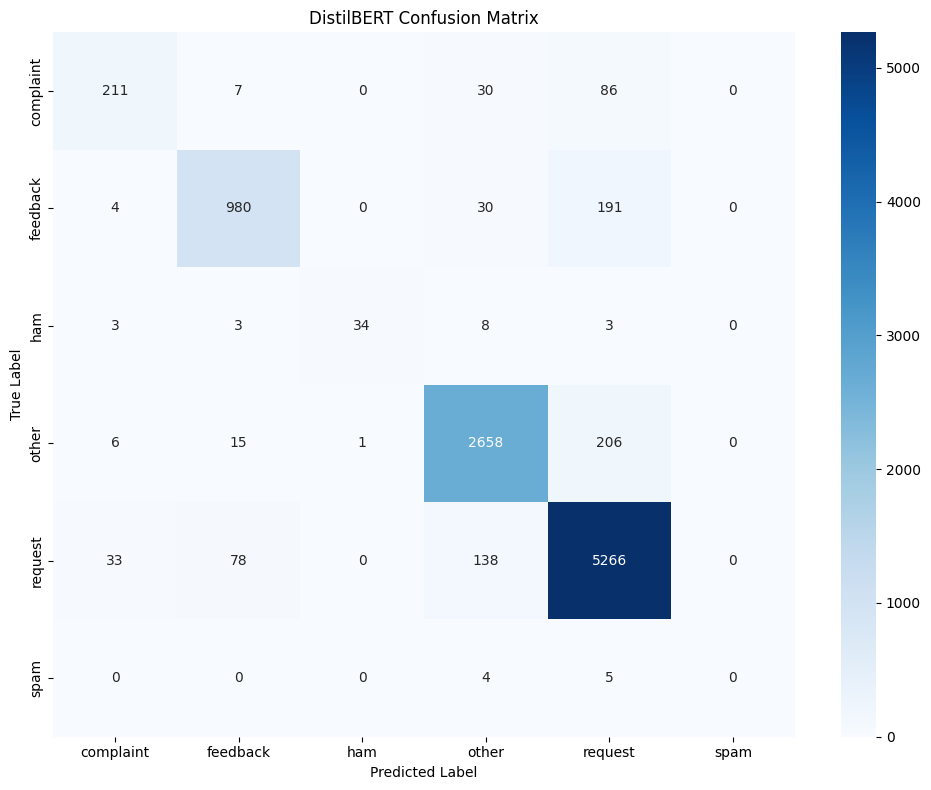

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("DistilBERT Confusion Matrix")
plt.tight_layout()
plt.show()
